# 플랜
## 1. 전처리
1. 이상치 제거
2. 차원축소
    1. feature selection
        - 'repair_cost'
        - 'insure_cost'
        - 'repair_cost','insure_cost'
    2. PCA 할 feature 선택 \
       여러 feature를 선형조합하여 잠재변수(latent variable)를 만들 수 있다면 선택 가능
       - 사고관련 feature
4. 더미화
    - 샘플링과 더미화 split의 순서가?
    - Q)더미화를 하고 샘플링을 하면 카테고리 데이터가 오염될 수 있지 않은가?
3. train_test_split
    - 샘플링 전에 나눠져야 하는데?
3. sampling (oversampling)
    - SMOTE
    - ADASYM
    - RandomOverSampling

## 2. 학습
여러번 할거니 함수를 만들면서 해보자
1. 모델 고르기
2. 성능평가
3. 학습
3. CV
4. pipeline ?
    
## 3. try
1. 조건을 바꿔가며 시도
2. 함수 개선?

### TODO : 
- `cumulative_use_count` 를 numeric으로 쓸 수 있을지 검토
- `pf_type == 0`은 날려보자

In [28]:
df = pd.read_csv('../datas/insurance_fraud_detect_data.csv')
df.shape

(16000, 25)

# -- Base --

## 1. 전처리

### 1-1. 이상치 제거

In [ ]:
## None

### 1-2. 차원축소
#### feature selection

In [ ]:
## None

#### PCA

In [ ]:
## None

### 1-3. train test split

In [10]:
from sklearn.model_selection import train_test_split

In [41]:
# CV를 사용할거니 test, eval을 나눌 필요 없다

# def train_valid_test_split(df, test_size=0.2, random_state=13):
#     train_set = df[df['test_set'] == 0]
#     test_set = df[df['test_set'] == 1]

#     train_set = train_set.drop('test_set', axis=1)
#     test_set = test_set.drop('test_set', axis=1)

#     X = train_set.drop('fraud_YN', axis=1)
#     y = train_set['fraud_YN']

#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)
#     X_eval, y_eval = test_set.drop('fraud_YN', axis=1), test_set['fraud_YN']
    
#     print('y_train : ', np.unique(y_train, return_counts=True))
#     print('y_test :', np.unique(y_test, return_counts=True))
#     print('y_eval :', np.unique(y_eval, return_counts=True))
    
#     return X_train, X_test, y_train, y_test, X_eval, y_eval

In [180]:
def split_train_test(df):
    train_set = df[df['test_set'] == 0]
    test_set = df[df['test_set'] == 1]

    X_train = train_set.drop(['test_set','fraud_YN'], axis=1)
    y_train = train_set['fraud_YN']

    X_test = test_set.drop(['test_set', 'fraud_YN'], axis=1)
    y_test = test_set['fraud_YN']
    
    print('get train test split!')
    print('y_train : ', list(map(lambda x: x.tolist(),np.unique(y_train, return_counts=True))))
    print('y_test :', list(map(lambda x: x.tolist(),np.unique(y_test, return_counts=True))) )

    return X_train, X_test, y_train, y_test

In [181]:
X_train, X_test, y_train, y_test = split_train_test(df)

get train test split!
y_train :  [[0, 1], [12845, 34]]
y_test : [[0, 1], [3114, 7]]


### 1-3. sampling

In [ ]:
## None

### 1-4. dummy

In [141]:
def dummy_train_test(X_train, X_test, features=None):
    X_train_1hot = pd.get_dummies(X_train, columns=features)
    X_test_1hot = pd.get_dummies(X_test, columns=features)
    
    print('get dummies!')
    print('X_train : ', X_train_1hot.shape)
    print('X_test : ', X_test_1hot.shape)
    
    return X_train_1hot, X_test_1hot

In [1]:
features = df.columns.drop(['fraud_YN', 'accident_ratio', 'repair_cost', 'insure_cost', 'repair_cnt', 'test_set'])
X_train_1hot, X_test_1hot = dummy_train_test(X_train, X_test, features=features)

NameError: name 'df' is not defined

## 2. 학습

### 2-1. model
- Logistic Regression
- Decision Tree
- Random Forest
- LightGBM

In [143]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

In [144]:
models = [('LogisticReg', LogisticRegression(random_state=13, solver='liblinear')),
          ('DecisionTree', DecisionTreeClassifier(random_state=13, max_depth=4)),
          ('RandomForest', RandomForestClassifier(random_state=13, n_jobs=-1, n_estimators=100)),
          ('LightGBM', LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False))]

model_names = [model[0] for model in models]
model_names

['LogisticReg', 'DecisionTree', 'RandomForest', 'LightGBM']

### 2-2. 성능평가

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [145]:
def get_clf_eval(y_test, pred):
    acc = accuracy_score(y_test, pred)
    pre = precision_score(y_test, pred)
    rec = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    auc = roc_auc_score(y_test, pred)
    
    return acc, pre, rec, f1, auc

def print_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    acc, pre, rec, f1, auc = get_clf_eval(y_test, pred)
    
    print('=> confusion matrix')
    print(confusion)
    print('======================')
    
    print('Accurary: {0:.4f}, Precision: {1:.4f}'.format(acc, pre))
    print('Recall: {0:.4f}, F1: {1:.4f}, AUC:{2: .4f}'.format(rec, f1, auc))
    
def get_result(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    
    return get_clf_eval(y_test, pred)

def get_result_pd(models, model_names, X_train, y_train, X_test, y_test):
    col_names = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
    tmp = []
    
    for model in models:
        tmp.append(get_result(model[1], X_train, y_train, X_test, y_test))
        
    return pd.DataFrame(tmp, columns=col_names, index=model_names)

### 2-3. 학습

In [147]:
import time

from sklearn.metrics import roc_curve

In [153]:
def draw_roc_curve(models, model_names, X_test, y_test):
    plt.figure(figsize=(10,10))
    
    for idx in range(len(models)):
        pred = models[idx][1].predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, pred)
        plt.plot(fpr, tpr, label=model_names[idx])
        
    plt.plot([0,1], [0,1], 'k--', label='random quess')
    plt.title('ROC')
    plt.legend()
    plt.grid()
    plt.show()

def fit_model(models, model_names, X_train, y_train, X_test, y_test):
    """
    models : models
    model_names : model_names
    X_train : X_train
    y_train : y_train
    X_test : X_test
    y_train : y_train
    """
    
    st_time = time.time()

    results = get_result_pd(models, model_names, X_train, y_train, X_test, y_test)

    print('Finish fitting!')
    print('Fit time :', time.time() - st_time)
    print('<Results>')
    print(results)
    draw_roc_curve(models, model_names, X_test, y_test)

/Users/dockyum/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dockyum/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dockyum/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Finish fitting!
Fit time : 1.3787577152252197
<Results>
              accuracy  precision  recall   f1   roc_auc
LogisticReg   0.997757        0.0     0.0  0.0  0.500000
DecisionTree  0.997116        0.0     0.0  0.0  0.499679
RandomForest  0.997757        0.0     0.0  0.0  0.500000
LightGBM      0.997757        0.0     0.0  0.0  0.500000


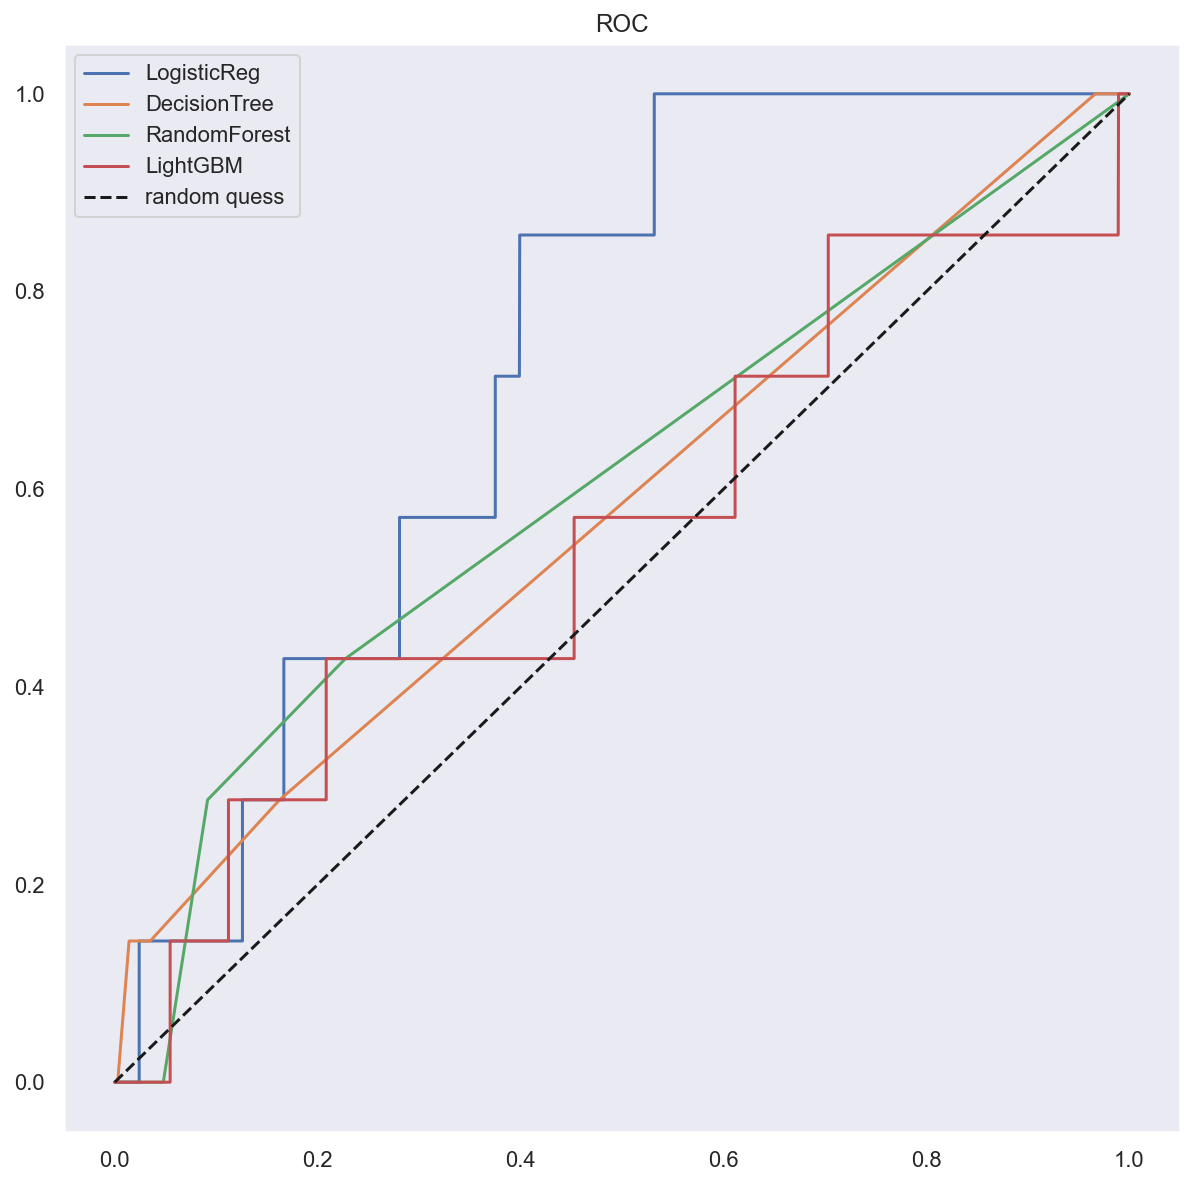

In [154]:
fit_model(models, model_names, X_train_1hot, y_train, X_test_1hot, y_test)

# ==> try-1
RandomOverSampling

## 1. 전처리

### 1-1. 이상치 제거

In [ ]:
## None

### 1-2. 차원축소
#### feature selection

In [ ]:
## None

#### PCA

In [ ]:
## None

### 1-3. train test split

In [156]:
X_train, X_test, y_train, y_test = split_train_test(df)

get train test split!
y_train :  [[0, 1], [12845, 34]]
y_test : [[0, 1], [3114, 7]]


### 1-3. sampling

In [34]:
from imblearn.over_sampling import RandomOverSampler

In [157]:
ROS = RandomOverSampler(random_state=13)
X_train_over, y_train_over = ROS.fit_resample(X_train, y_train)
np.unique(y_train_over, return_counts=True)

(array([0, 1]), array([12845, 12845]))

In [158]:
X_train.shape, y_train.shape

((12879, 23), (12879,))

In [159]:
X_train_over.shape, y_train_over.shape

((25690, 23), (25690,))

### 1-4. dummy

In [160]:
features = df.columns.drop(['fraud_YN', 'accident_ratio', 'repair_cost', 'insure_cost', 'repair_cnt', 'test_set'])
X_train_over_1hot, X_test_over_1hot = dummy_train_test(X_train_over, X_test, features=features)

get dummies!
X_train :  (25690, 75)
X_test :  (3121, 75)


## 2. 학습

### 2-1. model
- Logistic Regression
- Decision Tree
- Random Forest
- LightGBM

### 2-2. 성능평가
- get_clf_eval
- print_clf_eval
- get_result
- get_result_pd

### 2-3. 학습

Finish fitting!
Fit time : 2.5889699459075928
<Results>
              accuracy  precision    recall        f1   roc_auc
LogisticReg   0.860301   0.000000  0.000000  0.000000  0.431118
DecisionTree  0.697853   0.002128  0.285714  0.004224  0.492247
RandomForest  0.997437   0.000000  0.000000  0.000000  0.499839
LightGBM      0.992631   0.000000  0.000000  0.000000  0.497431


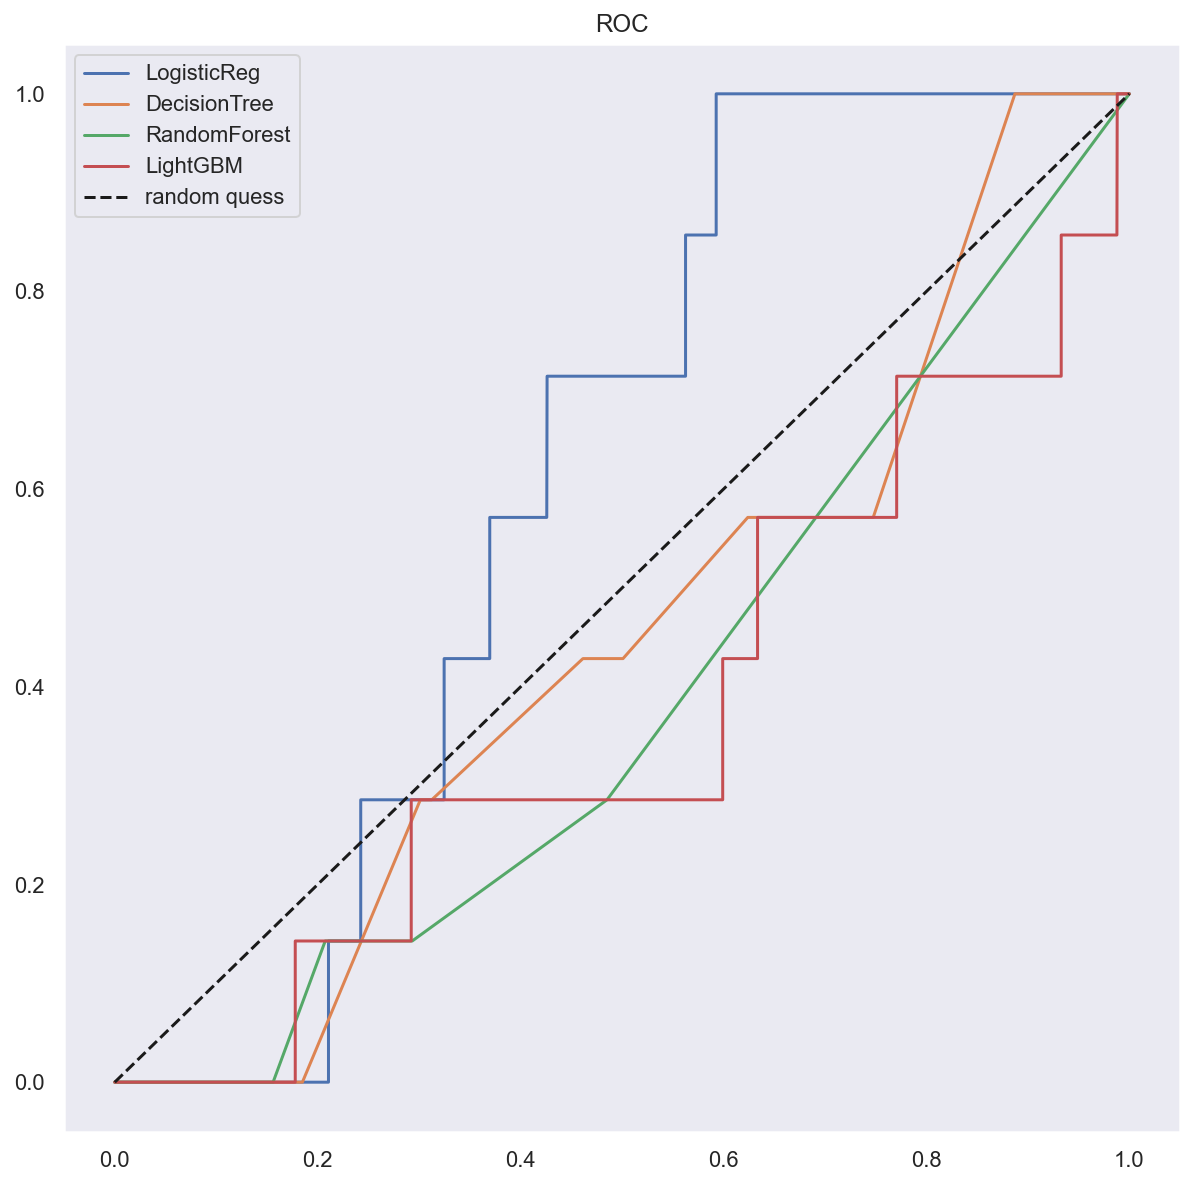

In [182]:
fit_model(models, model_names, X_train_over_1hot, y_train_over, X_test_over_1hot, y_test)

# ==> try-2
sampling : SMOTE

## 1. 전처리

### 1-1. 이상치 제거

In [ ]:
## None

### 1-2. 차원축소
#### feature selection

In [ ]:
## None

#### PCA

In [ ]:
## None

### 1-3. train test split

In [163]:
X_train, X_test, y_train, y_test = split_train_test(df)

get train test split!
y_train :  [[0, 1], [12845, 34]]
y_test : [[0, 1], [3114, 7]]


### 1-3. sampling

In [12]:
from imblearn.over_sampling import SMOTE

In [164]:
SAMPLER = SMOTE(random_state=13)
X_train_over, y_train_over = SAMPLER.fit_resample(X_train, y_train)
np.unique(y_train_over, return_counts=True)

(array([0, 1]), array([12845, 12845]))

In [165]:
X_train.shape, y_train.shape

((12879, 23), (12879,))

In [166]:
X_train_over.shape, y_train_over.shape

((25690, 23), (25690,))

### 1-4. dummy

In [168]:
features = df.columns.drop(['fraud_YN', 'accident_ratio', 'repair_cost', 'insure_cost', 'repair_cnt', 'test_set'])
X_train_over_1hot, X_test_1hot = dummy_train_test(X_train_over, X_test, features=features)

get dummies!
X_train :  (25690, 75)
X_test :  (3121, 75)


## 2. 학습

### 2-1. model
- Logistic Regression
- Decision Tree
- Random Forest
- LightGBM

### 2-2. 성능평가
- get_clf_eval
- print_clf_eval
- get_result
- get_result_pd

### 2-3. 학습

Finish fitting!
Fit time : 3.160238027572632
<Results>
              accuracy  precision    recall        f1   roc_auc
LogisticReg   0.860301   0.000000  0.000000  0.000000  0.431118
DecisionTree  0.697853   0.002128  0.285714  0.004224  0.492247
RandomForest  0.997437   0.000000  0.000000  0.000000  0.499839
LightGBM      0.992631   0.000000  0.000000  0.000000  0.497431


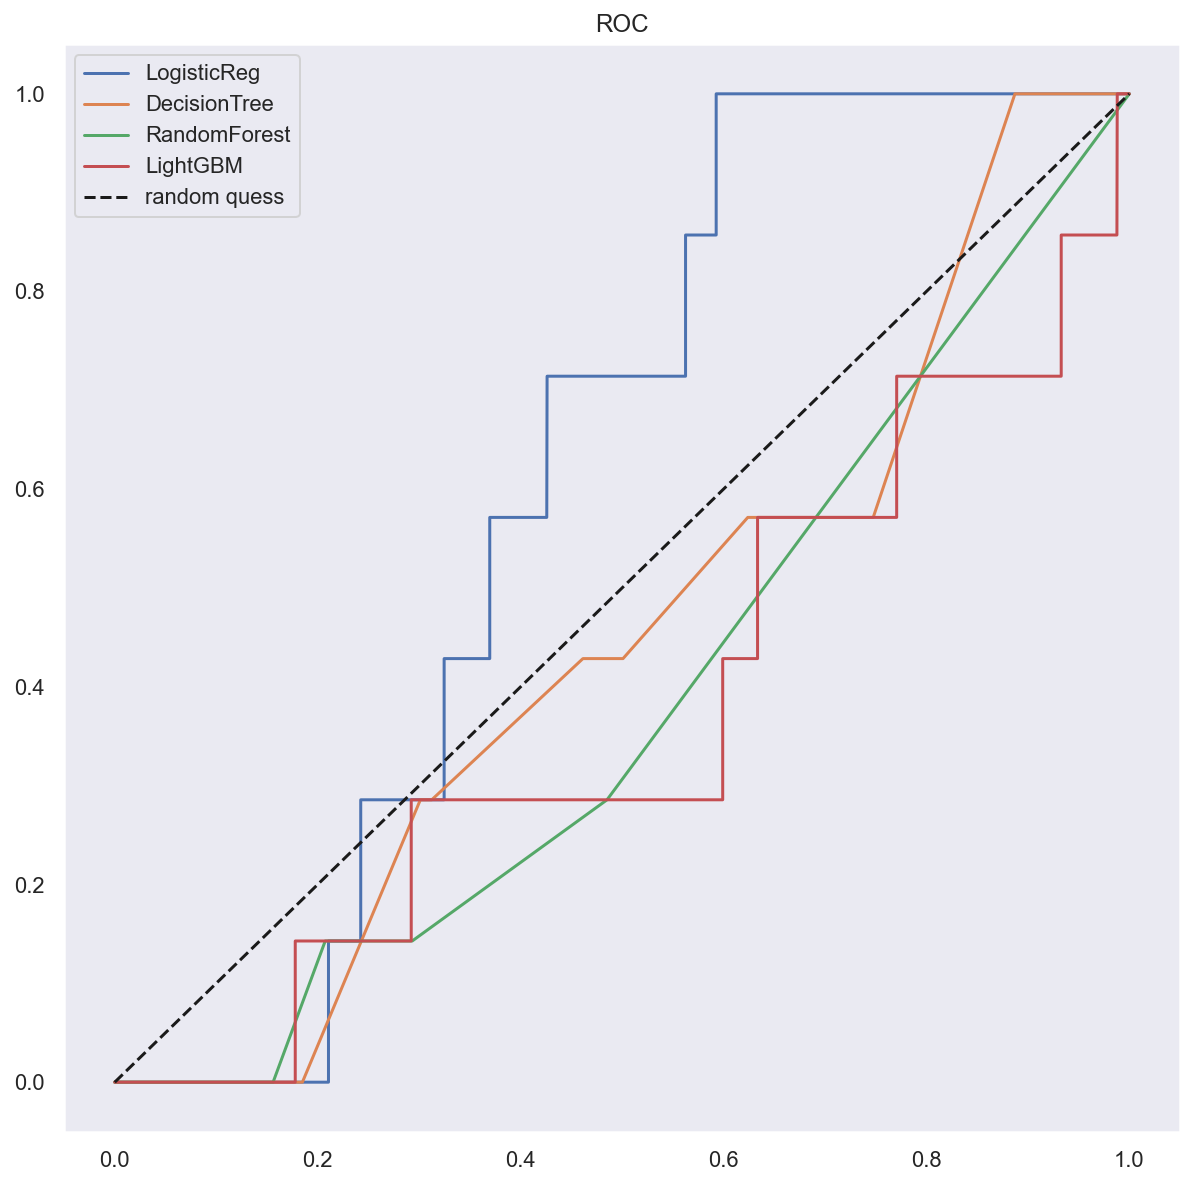

In [169]:
fit_model(models, model_names, X_train_over_1hot, y_train_over, X_test_1hot, y_test)

# ==> try-3
drop feature : 'total_prsn_cnt' , 'police_site_aid_YN', 'insurance_site_aid_YN', 'repair_cost', 'insure_cost' \
sampling : SMOTE

## 1. 전처리

### 1-1. 이상치 제거

In [ ]:
## None

### 1-2. 차원축소
#### feature selection

In [214]:
df_selected = df.drop(['total_prsn_cnt' , 'police_site_aid_YN', 'insurance_site_aid_YN', 'repair_cost', 'insure_cost'], axis=1)
df_selected.shape

(16000, 20)

#### PCA

In [ ]:
## None

### 1-3. train test split

In [215]:
X_train, X_test, y_train, y_test = split_train_test(df_selected)

get train test split!
y_train :  [[0, 1], [12845, 34]]
y_test : [[0, 1], [3114, 7]]


### 1-3. sampling

In [12]:
from imblearn.over_sampling import SMOTE

In [216]:
SAMPLER = SMOTE(random_state=13)
X_train_over, y_train_over = SAMPLER.fit_resample(X_train, y_train)
np.unique(y_train_over, return_counts=True)

(array([0, 1]), array([12845, 12845]))

In [217]:
X_train.shape, y_train.shape

((12879, 18), (12879,))

In [218]:
X_train_over.shape, y_train_over.shape

((25690, 18), (25690,))

### 1-4. dummy

In [ ]:
num_features = ['repair_cnt',]

In [232]:
def dummy_selected(df, X_train, X_test):
    """
    df : df to get_dummies
    X_train : 
    X_test : 
    """
    cat_features = ['car_model', 'sharing_type', 'age_group',
           'b2b', 'pf_type', 'start_hour','duration', 'accident_hour',
           'accident_location', 'acc_type1', 'insurance_site_aid_YN', 'police_site_aid_YN',
           'total_prsn_cnt']

    dum_features = [feature for feature in cat_features if feature in list(df.columns)]

    X_train_dummy, X_test_dummy = dummy_train_test(X_train, X_test, features=dum_features)
    return X_train_dummy, X_test_dummy

In [233]:
X_train_over_d, X_test_d = dummy_selected(df_selected, X_train_over, X_test)

get dummies!
X_train :  (25690, 53)
X_test :  (3121, 53)


## 2. 학습

### 2-1. model
- Logistic Regression
- Decision Tree
- Random Forest
- LightGBM

### 2-2. 성능평가
- get_clf_eval
- print_clf_eval
- get_result
- get_result_pd

### 2-3. 학습

Finish fitting!
Fit time : 3.002220869064331
<Results>
              accuracy  precision    recall       f1   roc_auc
LogisticReg   0.852291   0.000000  0.000000  0.00000  0.427103
DecisionTree  0.607177   0.002449  0.428571  0.00487  0.518075
RandomForest  0.995194   0.000000  0.000000  0.00000  0.498715
LightGBM      0.993592   0.000000  0.000000  0.00000  0.497913


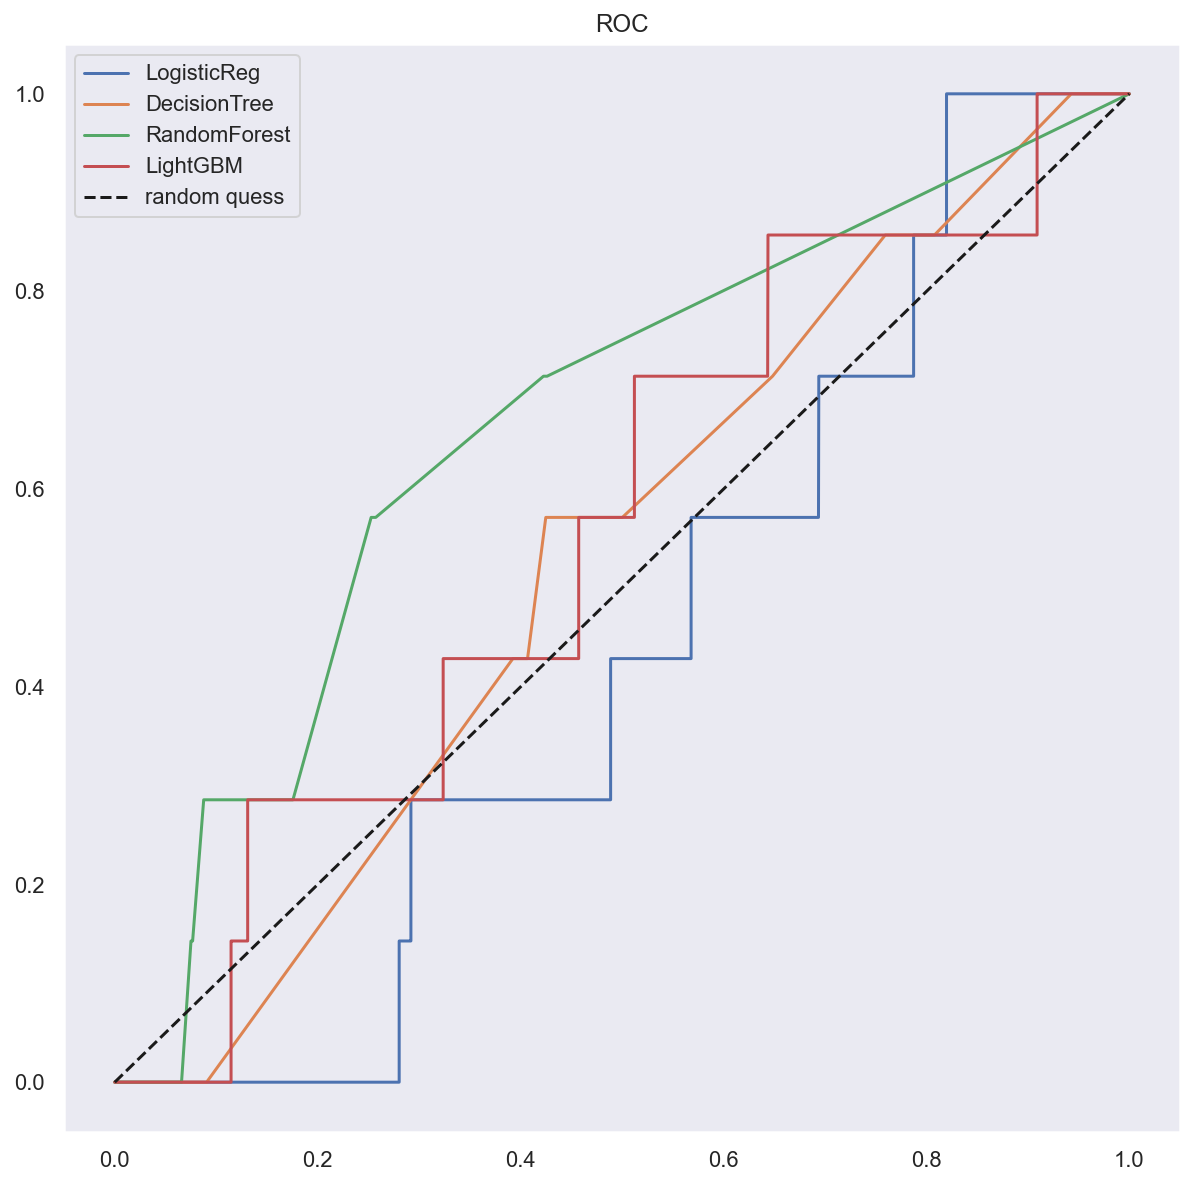

In [234]:
fit_model(models, model_names, X_train_over_d, y_train_over, X_test_d, y_test)

# ==> try-4
drop feature : 'total_prsn_cnt' , 'police_site_aid_YN', 'insurance_site_aid_YN', 'repair_cost', 'insure_cost' \
sampling : SMOTE \

## 1. 전처리

### 1-1. 이상치 제거

In [ ]:
## None

### 1-2. 차원축소
#### feature selection

In [214]:
df_selected = df.drop(['total_prsn_cnt' , 'police_site_aid_YN', 'insurance_site_aid_YN', 'repair_cost', 'insure_cost'], axis=1)
df_selected.shape

(16000, 20)

#### PCA

In [ ]:
## None

### 1-3. train test split

In [215]:
X_train, X_test, y_train, y_test = split_train_test(df_selected)

get train test split!
y_train :  [[0, 1], [12845, 34]]
y_test : [[0, 1], [3114, 7]]


### 1-3. sampling

In [12]:
from imblearn.over_sampling import SMOTE

In [216]:
SAMPLER = SMOTE(random_state=13)
X_train_over, y_train_over = SAMPLER.fit_resample(X_train, y_train)
np.unique(y_train_over, return_counts=True)

(array([0, 1]), array([12845, 12845]))

In [217]:
X_train.shape, y_train.shape

((12879, 18), (12879,))

In [218]:
X_train_over.shape, y_train_over.shape

((25690, 18), (25690,))

### 1-4. dummy

In [232]:
def dummy_selected(df, X_train, X_test):
    """
    df : df to get_dummies
    X_train : 
    X_test : 
    """
    cat_features = ['car_model', 'sharing_type', 'age_group',
           'b2b', 'pf_type', 'start_hour','duration', 'accident_hour',
           'accident_location', 'acc_type1', 'insurance_site_aid_YN', 'police_site_aid_YN',
           'total_prsn_cnt']

    dum_features = [feature for feature in cat_features if feature in list(df.columns)]

    X_train_dummy, X_test_dummy = dummy_train_test(X_train, X_test, features=dum_features)
    return X_train_dummy, X_test_dummy

In [233]:
X_train_over_d, X_test_d = dummy_selected(df_selected, X_train_over, X_test)

get dummies!
X_train :  (25690, 53)
X_test :  (3121, 53)


## 2. 학습

### 2-1. model
- Logistic Regression
- Decision Tree
- Random Forest
- LightGBM

### 2-2. 성능평가
- get_clf_eval
- print_clf_eval
- get_result
- get_result_pd

### 2-3. 학습

Finish fitting!
Fit time : 2.720953941345215
<Results>
              accuracy  precision    recall       f1   roc_auc
LogisticReg   0.852291   0.000000  0.000000  0.00000  0.427103
DecisionTree  0.607177   0.002449  0.428571  0.00487  0.518075
RandomForest  0.995194   0.000000  0.000000  0.00000  0.498715
LightGBM      0.993592   0.000000  0.000000  0.00000  0.497913


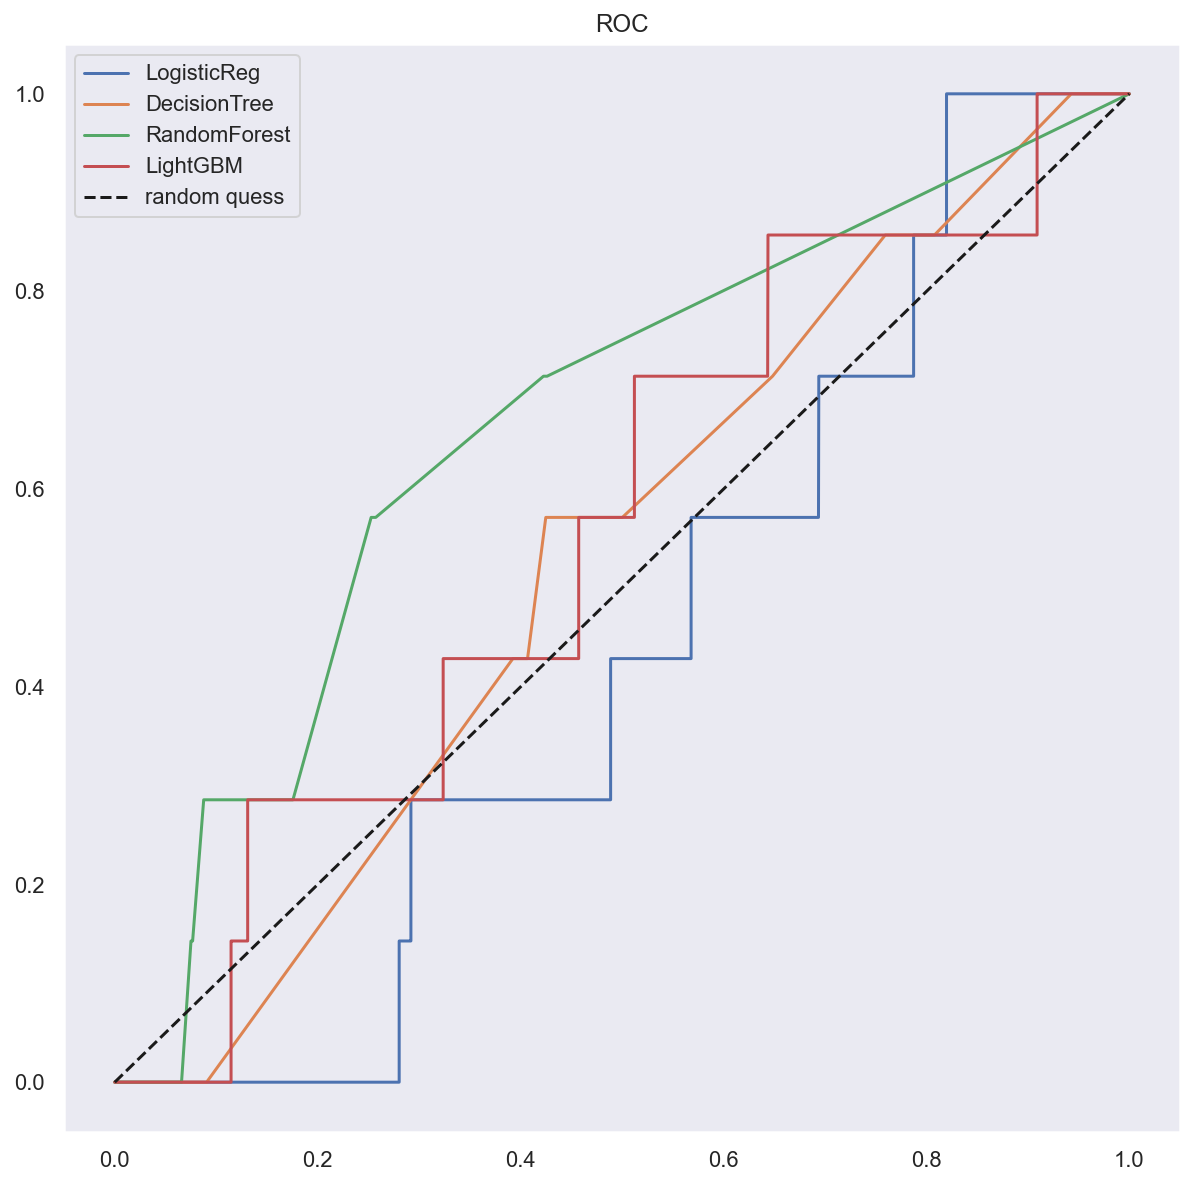

In [235]:
fit_model(models, model_names, X_train_over_d, y_train_over, X_test_d, y_test)

In [ ]:
PCA : 'start_hour' , 'duration', 'car_model'

In [1]:
from ml_repo_3.utils import * 

ModuleNotFoundError: No module named 'ml_repo_3'

In [2]:
print(dir())

['BeautifulSoup', 'In', 'Out', '_', '__', '___', '__builtin__', '__builtins__', '__doc__', '__loader__', '__name__', '__package__', '__spec__', '_dh', '_i', '_i1', '_i2', '_ih', '_ii', '_iii', '_oh', 'exit', 'get_ipython', 'mpl', 'np', 'pd', 'plt', 'quit', 'random', 'requests', 'sns', 'time']
